<a href="https://colab.research.google.com/github/anishasingh452/QP-Guru/blob/main/forest%20fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas matplotlib seaborn scikit-learn --quiet


In [2]:
import pandas as pd

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
df = pd.read_csv(url)

In [4]:
print("Dataset loaded successfully! Here's what it looks like:")
print(df.head())


Dataset loaded successfully! Here's what it looks like:
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [5]:
print("\n Summary:")
print(df.describe())


 Summary:
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469    1.791653    0.29595

In [6]:
print(df.columns)

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')


In [7]:
print(df.isnull().sum())

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


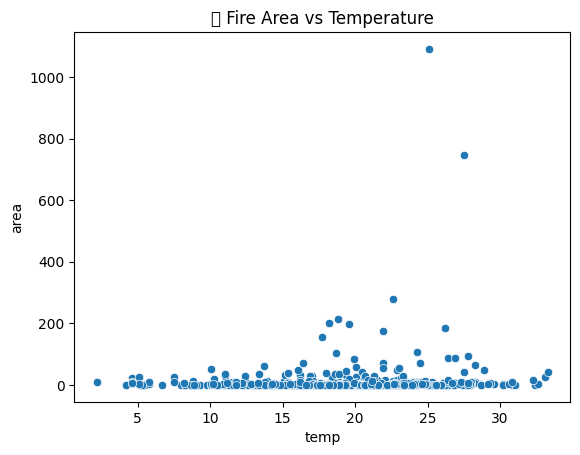

In [9]:
sns.scatterplot(data=df, x='temp', y='area')
plt.title("🔥 Fire Area vs Temperature")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

In [11]:
df_clean = df.drop(columns=["month", "day"])


In [12]:
df_clean["log_area"] = np.log1p(df_clean["area"])


In [14]:
X = df_clean.drop(columns=["area", "log_area"])
y = df_clean["log_area"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [16]:
y_pred = model.predict(X_test)

In [18]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"🔥 MAE: {mae:.3f}")
print(f"📈 R² Score: {r2:.3f}")



🔥 MAE: 1.218
📈 R² Score: -0.040


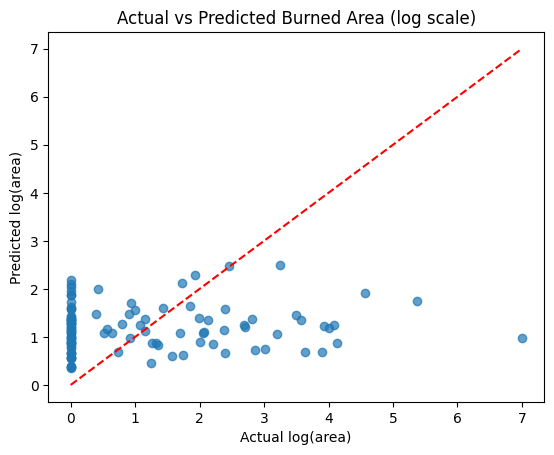

In [19]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual log(area)")
plt.ylabel("Predicted log(area)")
plt.title("Actual vs Predicted Burned Area (log scale)")
plt.show()


In [20]:
df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded, columns=["month", "day"], drop_first=True)

In [21]:
df_encoded["log_area"] = np.log1p(df_encoded["area"])


In [22]:
X = df_encoded.drop(columns=["area", "log_area"])
y = df_encoded["log_area"]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
!pip install xgboost --quiet
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [27]:
y_pred_xgb = xgb.predict(X_test)
from sklearn.metrics import mean_absolute_error, r2_score

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"🌲 XGBoost MAE: {mae_xgb:.3f}")
print(f"📈 XGBoost R² Score: {r2_xgb:.3f}")

🌲 XGBoost MAE: 1.285
📈 XGBoost R² Score: -0.184


In [28]:
# Drop near-zero variance columns
df_filtered = df_encoded.drop(columns=["area", "log_area", "rain"])  # rain is mostly 0

In [29]:
# Prepare features and target
X = df_filtered
y = np.log1p(df["area"])


In [30]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Try XGBoost with better settings
xgb = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=3, subsample=0.7, colsample_bytree=0.8, random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)


In [32]:
# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 Improved XGBoost MAE: {mae:.3f}")
print(f"📈 Improved XGBoost R²: {r2:.3f}")

📊 Improved XGBoost MAE: 1.231
📈 Improved XGBoost R²: -0.074


In [34]:
# Filter dataset to only include fires with area > 0
df_filtered = df[df['area'] > 0].copy()

# Encode month and day
df_filtered = pd.get_dummies(df_filtered, columns=['month', 'day'], drop_first=True)

# Log transform target
df_filtered['log_area'] = np.log1p(df_filtered['area'])

# Drop unneeded
X = df_filtered.drop(columns=['area', 'log_area', 'rain'])  # rain is mostly 0
y = df_filtered['log_area']

# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Retrain model (try Random Forest again here)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"🔥 Filtered RF MAE: {mae:.3f}")
print(f"📈 Filtered RF R²: {r2:.3f}")


🔥 Filtered RF MAE: 1.116
📈 Filtered RF R²: -0.124


In [36]:
## 🔥 Distribution of Burned Area The `area` feature is highly skewed — most fires burned very little land, with a few outliers burning large area

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


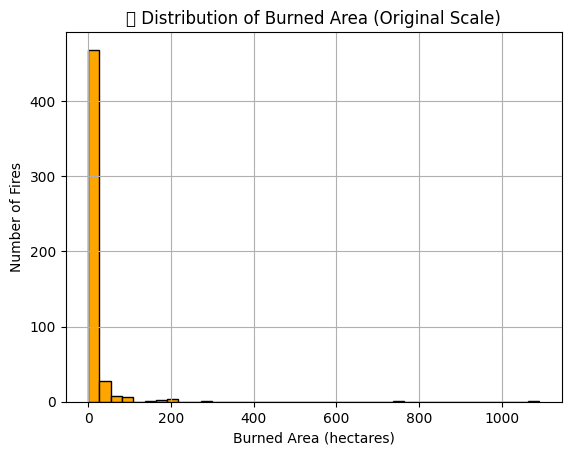

In [37]:
plt.hist(df['area'], bins=40, color='orange', edgecolor='black')
plt.xlabel("Burned Area (hectares)")
plt.ylabel("Number of Fires")
plt.title("🔥 Distribution of Burned Area (Original Scale)")
plt.grid(True)
plt.show()


In [38]:
## 🔄 Log-Transformed Area To stabilize variance and reduce skewness, we use `log1p(area)`.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


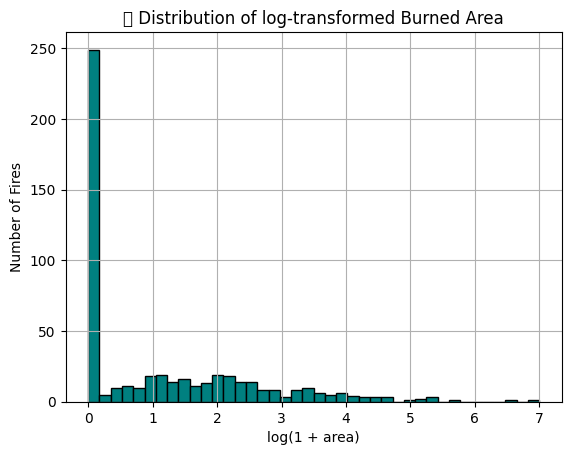

In [39]:
import numpy as np

plt.hist(np.log1p(df['area']), bins=40, color='teal', edgecolor='black')
plt.xlabel("log(1 + area)")
plt.ylabel("Number of Fires")
plt.title("📉 Distribution of log-transformed Burned Area")
plt.grid(True)
plt.show()

In [40]:
## Correlation Between Features This helps identify which variables are most associated with `area`, `temp`, etc.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


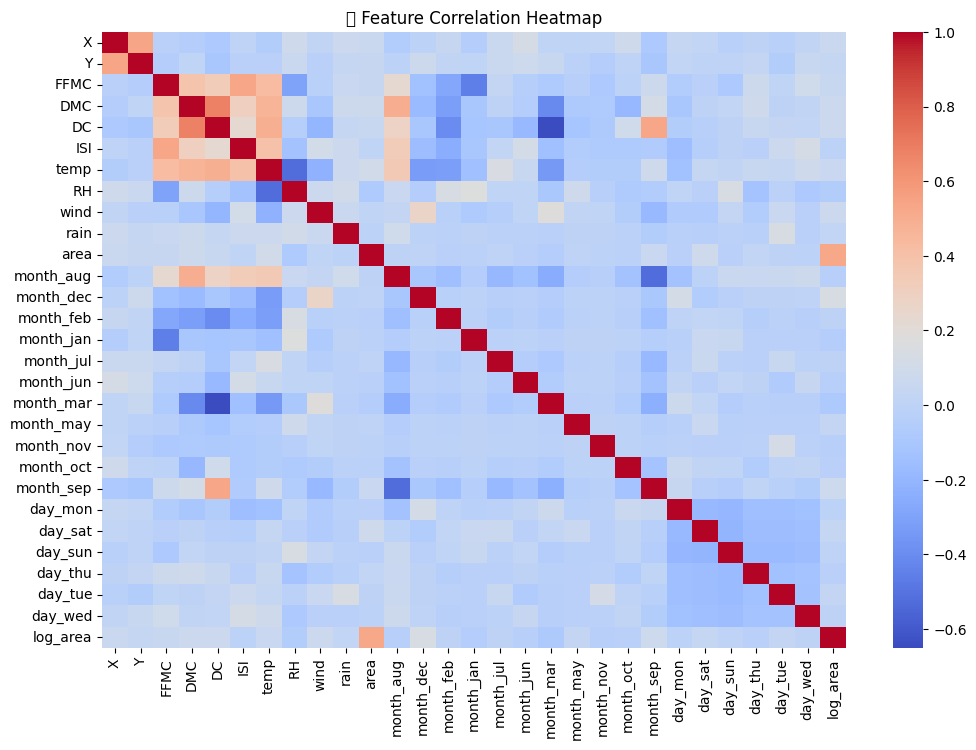

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=False)
plt.title("📊 Feature Correlation Heatmap")
plt.show()

In [42]:
## 🌡️ Temperature vs Area Temperature is expected to increase fire severity — we explore its correlation here.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


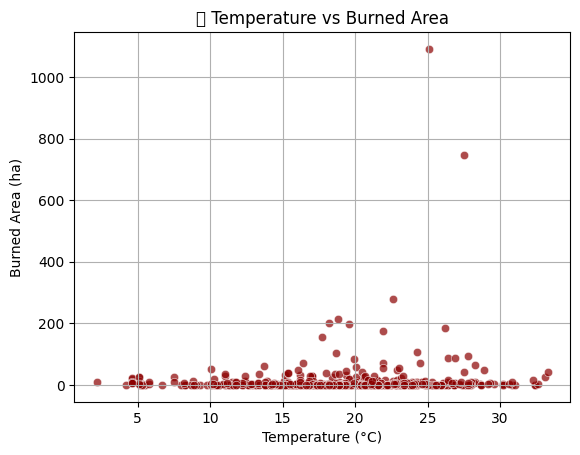

In [43]:
sns.scatterplot(data=df, x='temp', y='area', alpha=0.7, color='darkred')
plt.title("🌡️ Temperature vs Burned Area")
plt.xlabel("Temperature (°C)")
plt.ylabel("Burned Area (ha)")
plt.grid(True)
plt.show()

In [45]:
## 🔍 Feature Importances (Random Forest) This shows which input variables were most useful in predicting burned area.


/tmp/ipython-input-46-3247899893.py:11: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


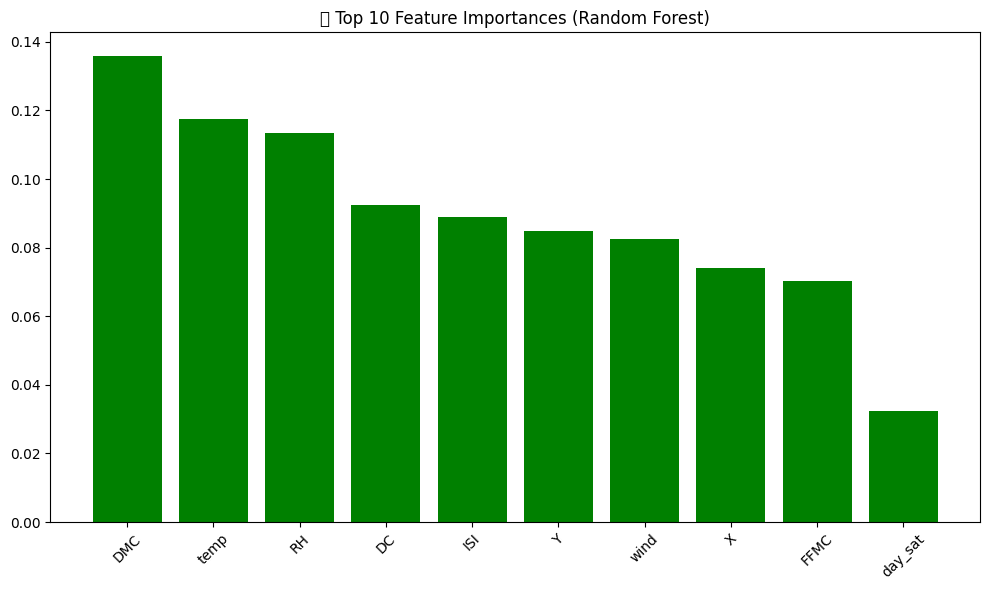

In [46]:
model.fit(X_train, y_train)

importances = model.feature_importances_
feat_names = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("🌲 Top 10 Feature Importances (Random Forest)")
plt.bar(range(10), importances[indices[:10]], color='green')
plt.xticks(range(10), [feat_names[i] for i in indices[:10]], rotation=45)
plt.tight_layout()
plt.show()

In [47]:
## 💨 Wind Speed vs Burned Area High wind can accelerate fire spread, but the relationship isn't always linear.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128168 (\N{DASH SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


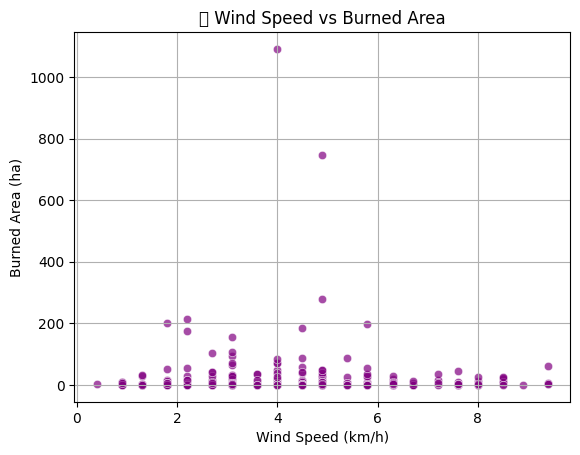

In [48]:
sns.scatterplot(data=df, x='wind', y='area', alpha=0.7, color='purple')
plt.title("💨 Wind Speed vs Burned Area")
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Burned Area (ha)")
plt.grid(True)
plt.show()

In [50]:
## 💧 Relative Humidity vs Burned Area Fires are expected to decrease when RH is high — we test this relationship visuall

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


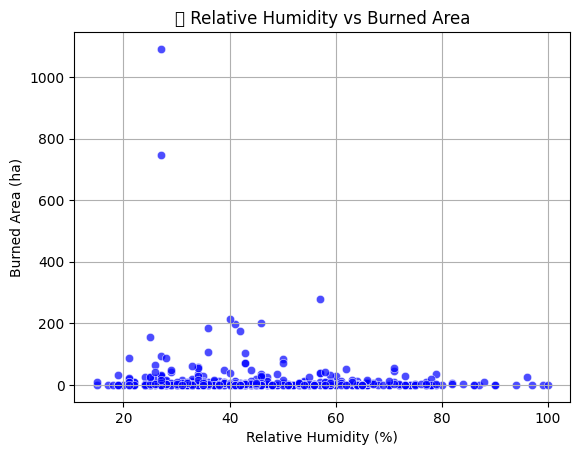

In [51]:
sns.scatterplot(data=df, x='RH', y='area', alpha=0.7, color='blue')
plt.title("💧 Relative Humidity vs Burned Area")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Burned Area (ha)")
plt.grid(True)
plt.show()


In [52]:
## 📅 Fire Frequency by Month We explore the number of fires across different months — this shows seasonal patterns.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


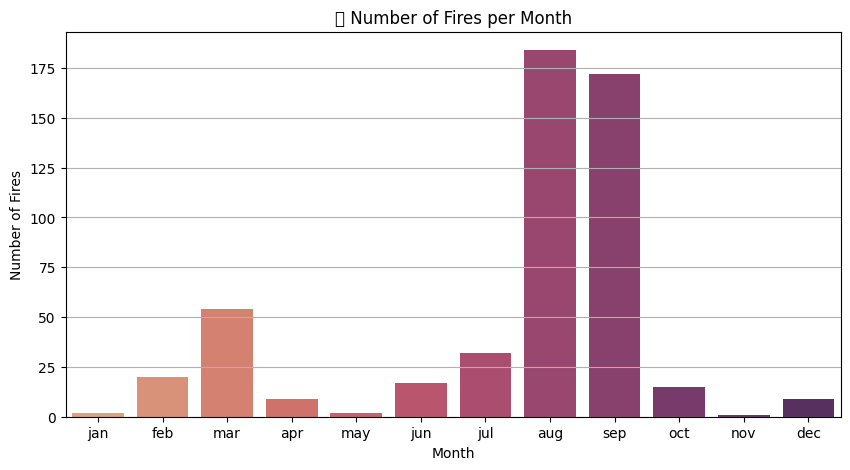

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='month', order=[
    'jan', 'feb', 'mar', 'apr', 'may', 'jun',
    'jul', 'aug', 'sep', 'oct', 'nov', 'dec'
], palette='flare')

plt.title("📅 Number of Fires per Month")
plt.xlabel("Month")
plt.ylabel("Number of Fires")
plt.grid(True, axis='y')
plt.show()